In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
file=r'C:\titance\train.csv'
train_data=pd.read_csv(file)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis (EDA)

In [4]:
print('Shape of data',":",train_data.shape)

Shape of data : (891, 12)


In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
for col in train_data.columns:
    print(col,":",train_data[col].isnull().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


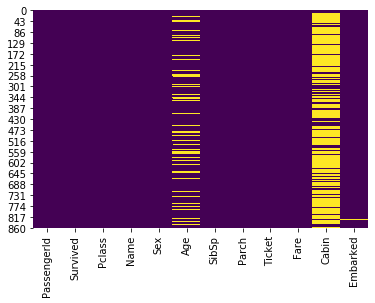

In [7]:
sns.heatmap(train_data.isnull(), yticklabels='auto', cbar=None, cmap='viridis')

Lets look at overall survival stats^

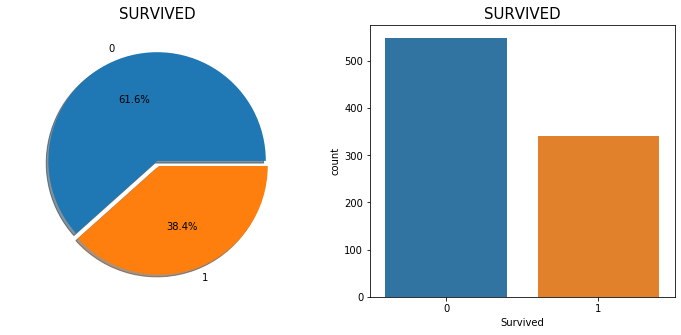

In [8]:
fig, ax=plt.subplots(1,2, figsize=(12,5))
train_data.Survived.value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True, ax=ax[0])
ax[0].set_title('SURVIVED', fontsize=15)
ax[0].set_ylabel(' ')

sns.countplot(x='Survived', data=train_data, ax=ax[1])
ax[1].set_title('SURVIVED', fontsize=15)
plt.show()

*Analysis features
Sex
Pclass
Age
Embarked
SibSip & Parch
Fare

SEX

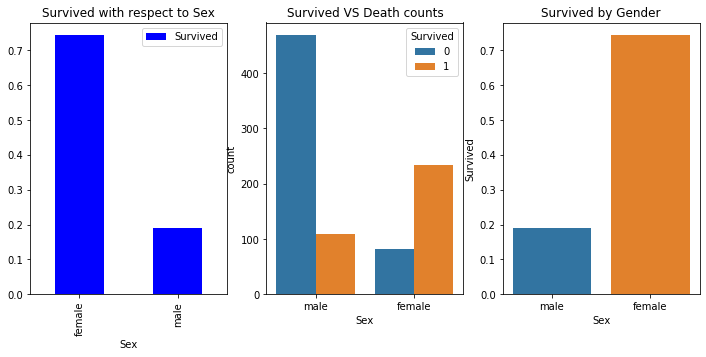

In [9]:
fig, ax=plt.subplots(1,3, figsize=(12,5))
train_data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(color='blue', ax=ax[0])
ax[0].set_title('Survived with respect to Sex')

sns.countplot(x='Sex', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Survived VS Death counts')

sns.barplot(x='Sex', y='Survived', data=train_data, ci=None, ax=ax[2])
ax[2].set_title('Survived by Gender')
plt.show()

PCLASS

In [10]:
train_data['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

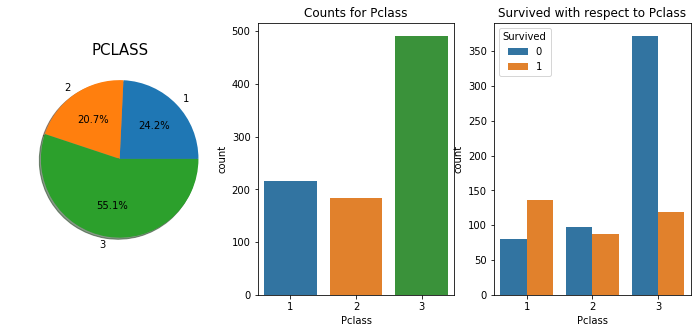

In [11]:
fig, ax=plt.subplots(1,3, figsize=(12,5))
train_data['Pclass'].value_counts().sort_index().plot.pie(explode=[0,0,0],
                                                          autopct='%1.1f%%', shadow=True, ax=ax[0])
ax[0].set_title('PCLASS', fontsize=15)
ax[0].set_ylabel(' ')

sns.countplot(x='Pclass', data=train_data, ax=ax[1])
ax[1].set_title('Counts for Pclass')

sns.countplot(x='Pclass', hue='Survived', data=train_data, ax=ax[2])
ax[2].set_title('Survived with respect to Pclass')
plt.show()

Age

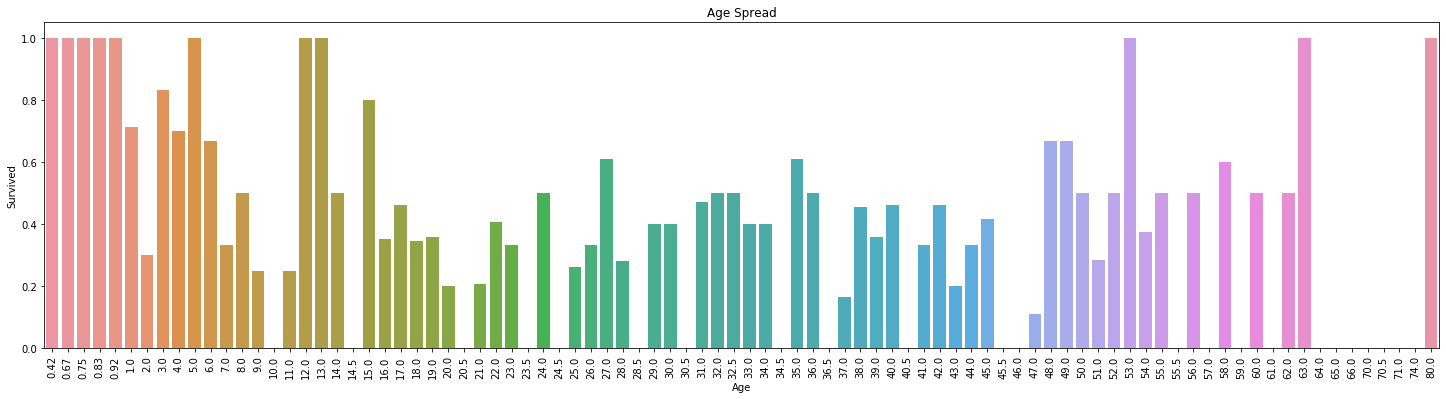

In [12]:
fig, ax=plt.subplots(1,1, figsize=(25,6))
sns.barplot(x='Age', y='Survived', data=train_data ,ax=ax, ci=None)
ax.set_title('Age Spread')
plt.xticks(rotation=90)
plt.show()

In [13]:
train_data['Initials']=0
for i in train_data:
    train_data['Initials']=train_data.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(train_data.Initials, train_data.Sex).T.style.background_gradient(cmap='summer_r')

Initials,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [14]:
train_data.Initials.replace(['Capt','Col','Countess', 'Don', 'Dr','Jonkheer','Lady','Major','Master',
                             'Miss','Mlle','Mme', 'Mr','Mrs','Ms','Rev','Sir'],
                            ['Mr','Other','Mrs','Mr','Mr','Other','Mrs','Mr','Master',
                             'Miss','Miss','Miss','Mr', 'Mrs','Miss', 'Other', 'Mr'],
                             inplace=True)

In [15]:
train_data.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [16]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initials=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initials=='Miss'),'Age']=21
train_data.loc[(train_data.Age.isnull())&(train_data.Initials=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initials=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initials=='Other'),'Age']=46

In [17]:
train_data.Age.isnull().any()

False

Embarked 

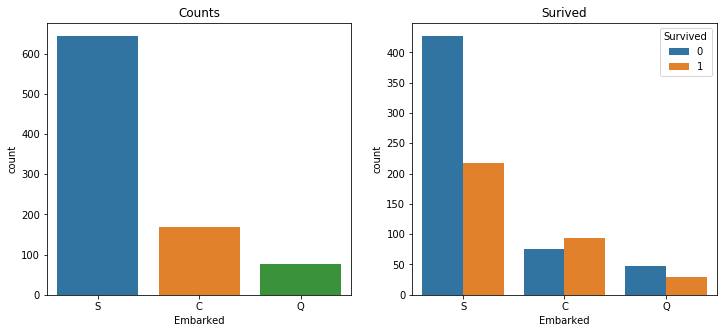

In [18]:
fig, ax=plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='Embarked', data=train_data, ax=ax[0])
ax[0].set_title('Counts')

sns.countplot(x='Embarked', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Surived')
plt.show()

In [19]:
train_data.Embarked.fillna('S', inplace=True)

In [20]:
train_data.Embarked.isnull().any()

False

SibSip & Parch

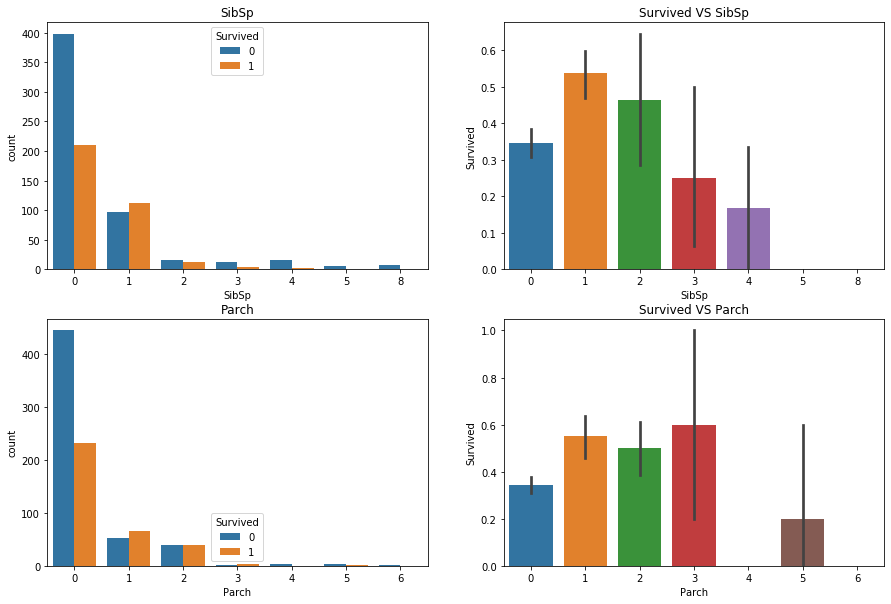

In [21]:
fig, ax=plt.subplots(2,2, figsize=(15,10))
sns.countplot(x='SibSp', hue='Survived', data=train_data, ax=ax[0,0])
ax[0,0].set_title('SibSp')

sns.barplot(x='SibSp', y='Survived', data=train_data, ax=ax[0,1])
ax[0,1].set_title('Survived VS SibSp')

sns.countplot(x='Parch', hue='Survived', data=train_data, ax=ax[1,0])
ax[1,0].set_title('Parch')

sns.barplot(x='Parch', y='Survived', data=train_data, ax=ax[1,1])
ax[1,1].set_title('Survived VS Parch')
plt.show()

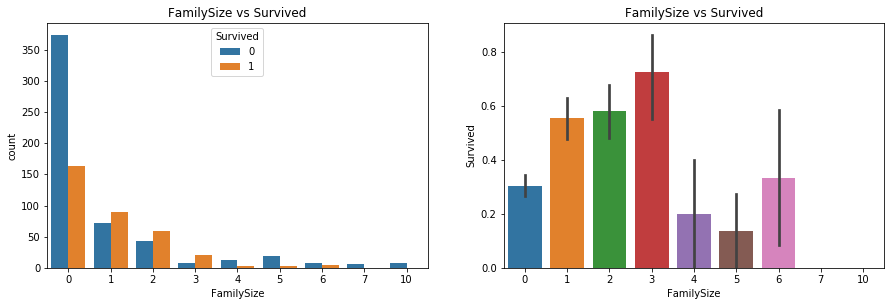

In [22]:
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp']
f,ax=plt.subplots(1,2,figsize=(15,4.5))
sns.countplot('FamilySize',hue='Survived',data=train_data,ax=ax[0])
ax[0].set_title('FamilySize vs Survived')
sns.barplot('FamilySize','Survived',data=train_data,ax=ax[1])
ax[1].set_title('FamilySize vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


Fare

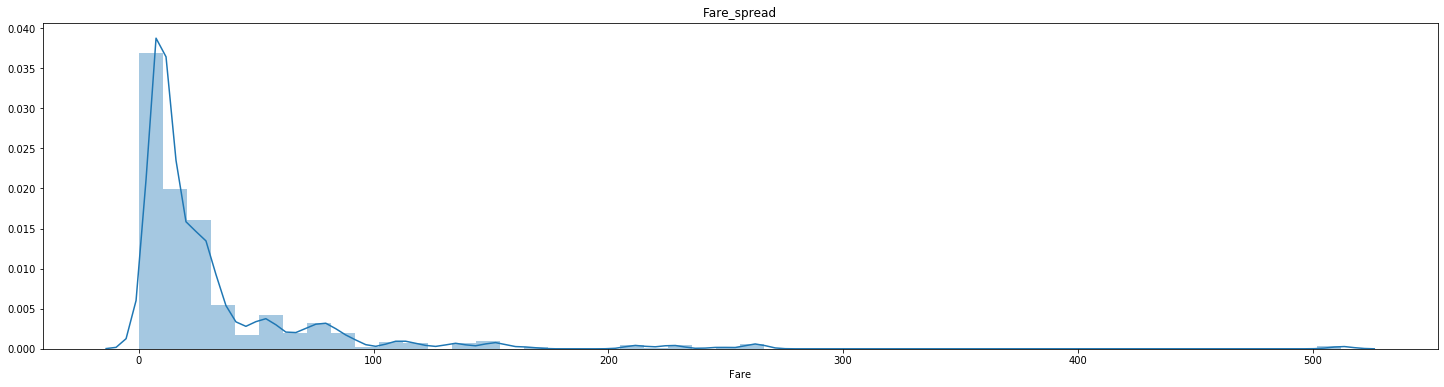

In [23]:
fig, ax=plt.subplots(1,1, figsize=(25,6))
sns.distplot(train_data.Fare, ax=ax)
ax.set_title('Fare_spread')
plt.show()

In [24]:
print('Highest Fare:',train_data.Fare.max(), 'lowest Fare:',train_data.Fare.min(),
     'Average Fare:',train_data.Fare.mean())

Highest Fare: 512.3292 lowest Fare: 0.0 Average Fare: 32.2042079685746


In [25]:
train_data['FareBins']=pd.qcut(train_data.Fare, 6)
train_data.groupby(['FareBins'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
FareBins,
"(-0.001, 7.775]",0.205128
"(7.775, 8.662]",0.190789
"(8.662, 14.454]",0.366906
"(14.454, 26.0]",0.436242
"(26.0, 52.369]",0.417808
"(52.369, 512.329]",0.697987


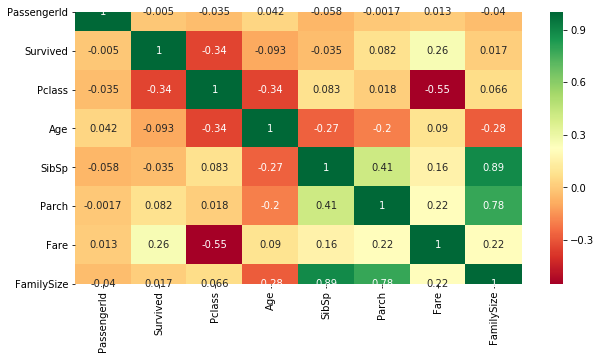

In [26]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn') #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [27]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
train_data[['Sex']]=train_data[['Sex']].apply(lambda x : x.map({'male':0, 'female':1}))

In [29]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train_data[['Embarked']]=train_data[['Embarked']].apply(lambda x : x.map({'S':0, 'C':1, 'Q':2}))

In [31]:
train_data['Initials'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initials, dtype: int64

In [32]:
train_data[['Initials']]=train_data[['Initials']].apply(lambda x : x.map({'Mr':0, 'Miss':1,
                                                                         'Mrs':2, 'Master':3,
                                                                         'Other':4}))

In [33]:
print('Highest Age:',train_data['Age'].max(),'  Lowest Age:',train_data['Age'].min())

Highest Age: 80.0   Lowest Age: 0.42


In [34]:
train_data['Age_Cat']=0
train_data.loc[(train_data['Age']<=16), 'Age_Cat']=0
train_data.loc[(train_data['Age']>16) & (train_data['Age']<=32), 'Age_Cat']=1
train_data.loc[(train_data['Age']>32) & (train_data['Age']<=48), 'Age_Cat']=2
train_data.loc[(train_data['Age']>48) & (train_data['Age']<=64), 'Age_Cat']=3
train_data.loc[(train_data['Age']>64), 'Age_Cat']=4

In [35]:
train_data['FareBins'].value_counts()

(-0.001, 7.775]      156
(7.775, 8.662]       152
(52.369, 512.329]    149
(14.454, 26.0]       149
(26.0, 52.369]       146
(8.662, 14.454]      139
Name: FareBins, dtype: int64

In [36]:
train_data['Fare_Cat']=0
train_data.loc[(train_data['Fare']<=7.775), 'Fare_Cat']=0
train_data.loc[(train_data['Fare']>7.775) & (train_data['Fare']<=8.662), 'Fare_Cat']=1
train_data.loc[(train_data['Fare']>8.662) & (train_data['Fare']<=14.454), 'Fare_Cat']=2
train_data.loc[(train_data['Fare']>14.454) & (train_data['Fare']<=26.0), 'Fare_Cat']=3
train_data.loc[(train_data['Fare']>26.0) & (train_data['Fare']<=52.369), 'Fare_Cat']=4
train_data.loc[(train_data['Fare']>52.369), 'Fare_Cat']=5

In [37]:
train_data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int64
Initials          int64
FamilySize        int64
FareBins       category
Age_Cat           int64
Fare_Cat          int64
dtype: object

In [38]:
train_data.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch',
                'Ticket', 'Fare', 'Cabin', 'FareBins'], axis=1, inplace=True)

In [39]:
train_data.head(2)

,Survived,Pclass,Sex,Embarked,Initials,FamilySize,Age_Cat,Fare_Cat
0,0,3,0,0,0,1,1,0
1,1,1,1,1,2,1,2,5


In [40]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [41]:
train_feature=train_data.drop(['Survived'], axis=1)
train_feature

,Pclass,Sex,Embarked,Initials,FamilySize,Age_Cat,Fare_Cat
0,3,0,0,0,1,1,0
1,1,1,1,2,1,2,5
2,3,1,0,1,0,1,1
3,1,1,0,2,1,2,5
4,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...
886,2,0,0,4,0,1,2
887,1,1,0,1,0,1,4
888,3,1,0,1,3,1,3
889,1,0,1,0,0,1,4


In [42]:
train_target=train_data['Survived']
train_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
X_train, X_test,y_train, y_test= train_test_split(train_feature,train_target,test_size=0.3,
                                                  random_state=0)

In [44]:
print(X_train.shape,  X_test.shape,  y_train.shape,  y_test.shape)

(623, 7) (268, 7) (623,) (268,)


In [45]:
model = LogisticRegression(C=0.05,solver='liblinear')
model.fit(X_train ,y_train.values.ravel())
LR_prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression model is \t',metrics.accuracy_score(LR_prediction,y_test))

The accuracy of the Logistic Regression model is 	 0.8097014925373134


In [46]:
# Naive Bayes
model=GaussianNB()
model.fit(X_train,y_train.values.ravel())
NB_prediction=model.predict(X_test)
print('The accuracy of the NaiveBayes model is\t\t\t',metrics.accuracy_score(NB_prediction,y_test))

The accuracy of the NaiveBayes model is			 0.8097014925373134


In [47]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
DT_prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is \t\t\t',metrics.accuracy_score(DT_prediction,y_test))

The accuracy of the Decision Tree is 			 0.8432835820895522


In [48]:
# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train.values.ravel())
RF_prediction=model.predict(X_test)
print('The accuracy of the Random Forests model is \t\t',metrics.accuracy_score(RF_prediction,y_test))

The accuracy of the Random Forests model is 		 0.8395522388059702


A confusion matrix is a table that is often used to describe the performance of a classification model. 

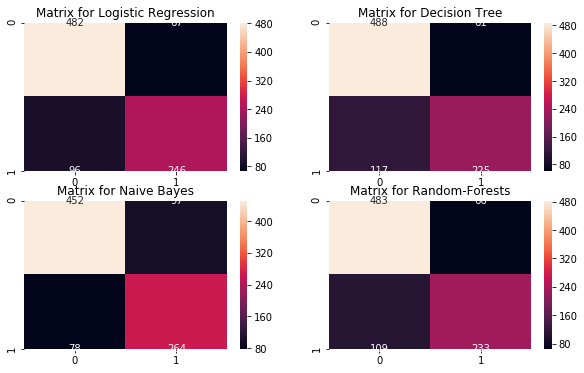

In [63]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

f,ax=plt.subplots(2,2,figsize=(10,6))
y_pred = cross_val_predict(LogisticRegression(C=0.05,solver='liblinear'),train_feature,train_target,cv=10)
sns.heatmap(confusion_matrix(train_target,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),train_feature,train_target,cv=10)
sns.heatmap(confusion_matrix(train_target,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),train_feature,train_target,cv=10)
sns.heatmap(confusion_matrix(train_target,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Naive Bayes')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),train_feature,train_target,cv=10)
sns.heatmap(confusion_matrix(train_target,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Random-Forests')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Ensembling
Ensembling is a way to increase performance of a model by combining several simple models to create a single powerful model.
Ensembling can be done in ways like: Voting Classifier, Bagging, Boosting.

I will use voting method in this kernal

In [69]:

from sklearn.ensemble import VotingClassifier
estimators=[('RFor',RandomForestClassifier(n_estimators=100,random_state=0)),
            ('LR',LogisticRegression(C=0.05,solver='liblinear')),
            ('DT',DecisionTreeClassifier()),
            ('NB',GaussianNB())]
ensemble=VotingClassifier(estimators=estimators,voting='soft')
ensemble.fit(X_train,y_train.values.ravel())
print('The accuracy for ensembled model is:',ensemble.score(X_test, y_test))
cross=cross_val_score(ensemble,train_feature,train_target, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8025051072522983


We can see that ensemble model does better than individual models. lets use that for predictions.

In [70]:
Ensemble_Model_For_Prediction=VotingClassifier(estimators=[
                                       ('RFor',RandomForestClassifier(n_estimators=200,random_state=0)),
                                       ('LR',LogisticRegression(C=0.05,solver='liblinear')),
                                       ('DT',DecisionTreeClassifier(random_state=0)),
                                       ('NB',GaussianNB())
                                             ], 
                       voting='soft')
Ensemble_Model_For_Prediction.fit(train_feature,train_target)

VotingClassifier(estimators=[('RFor',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=200,
                                                     n_jobs=None,
        

We need to do some preprocessing to this test data set before we can feed that to the trained model.

In [71]:
file=r'C:\titance\test.csv'
test=pd.read_csv(file)
test.head()

IDtest = test["PassengerId"]
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [72]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:

# Construct feature Initial
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)

# Fill Null values in Age Column
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=46
# Fill Null values in Fare Column
test.loc[(test.Fare.isnull()) & (test['Pclass']==3),'Fare'] = 12.45

# Construct feature Age_cat
test['Age_cat']=0
test.loc[test['Age']<=16,'Age_cat']=0
test.loc[(test['Age']>16)&(test['Age']<=32),'Age_cat']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_cat']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_cat']=3
test.loc[test['Age']>64,'Age_cat']=4

# Construct feature Fare_cat
test['Fare_cat']=0
test.loc[test['Fare']<=7.775,'Fare_cat']=0
test.loc[(test['Fare']>7.775)&(test['Fare']<=8.662),'Fare_cat']=1
test.loc[(test['Fare']>8.662)&(test['Fare']<=14.454),'Fare_cat']=2
test.loc[(test['Fare']>14.454)&(test['Fare']<=26.0),'Fare_cat']=3
test.loc[(test['Fare']>26.0)&(test['Fare']<=52.369),'Fare_cat']=4
test.loc[test['Fare']>52.369,'Fare_cat']=5

# Construct feature FamilySize
test['FamilySize'] = test['Parch'] + test['SibSp']
# Drop unwanted features
test.drop(['Name','Age','Ticket','Cabin','SibSp','Parch','Fare','PassengerId'],axis=1,inplace=True)

# Converting String Values into Numeric 
test['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

test.head(2)

,Pclass,Sex,Embarked,Initial,Age_cat,Fare_cat,FamilySize
0,3,0,2,0,2,1,0
1,3,1,0,1,2,0,1


In [78]:
# Predict
test_Survived = pd.Series(ensemble.predict(test), name="Survived")
results = pd.concat([IDtest,test_Survived],axis=1)
results.to_csv("predictions.csv",index=False)

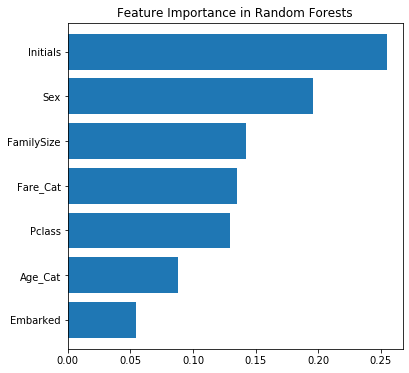

In [77]:
f,ax=plt.subplots(1,1,figsize=(6,6))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(train_feature,train_target)
pd.Series(model.feature_importances_,train_feature.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax)
ax.set_title('Feature Importance in Random Forests')
plt.show()